#### 1. Import the necessary packages - 2.5 marks

In [158]:
#your answer here
import numpy as np
import pandas as pd
import datetime 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

import warnings
warnings.filterwarnings("ignore")

from PIL import Image

from sklearn import metrics

from sklearn.model_selection import train_test_split

%matplotlib inline 

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [159]:
data1 = pd.read_csv('Data.csv')
dataframe = pd.DataFrame(data1)
dataframe 

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [160]:
item1 = pd.read_csv('item.csv')
dataframe = pd.DataFrame(item1)
dataframe

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [161]:
user1 = pd.read_csv('user.csv')
dataframe = pd.DataFrame(user1)
dataframe

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [162]:
data1.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [163]:
data1.info

<bound method DataFrame.info of        user id  movie id  rating  timestamp
0          196       242       3  881250949
1          186       302       3  891717742
2           22       377       1  878887116
3          244        51       2  880606923
4          166       346       1  886397596
...        ...       ...     ...        ...
99995      880       476       3  880175444
99996      716       204       5  879795543
99997      276      1090       1  874795795
99998       13       225       2  882399156
99999       12       203       3  879959583

[100000 rows x 4 columns]>

In [164]:
data1.shape

(100000, 4)

In [165]:
data1.describe()

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [166]:
df = data1
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False) 
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  
    return missing_data 
missing_check(data1)

,Total,Percent
timestamp,0,0.0
rating,0,0.0
movie id,0,0.0
user id,0,0.0


In [167]:
dataframe = pd.DataFrame(data1)
dataframe.dropna()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [168]:
item1.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [169]:
item1.info

<bound method DataFrame.info of       movie id                          movie title release date  unknown  \
0            1                           Toy Story   01-Jan-1995        0   
1            2                           GoldenEye   01-Jan-1995        0   
2            3                          Four Rooms   01-Jan-1995        0   
3            4                          Get Shorty   01-Jan-1995        0   
4            5                             Copycat   01-Jan-1995        0   
...        ...                                  ...          ...      ...   
1676      1678                          Mat' i syn   06-Feb-1998        0   
1677      1679                           B. Monkey   06-Feb-1998        0   
1678      1680                       Sliding Doors   01-Jan-1998        0   
1679      1681                        You So Crazy   01-Jan-1994        0   
1680      1682  Scream of Stone (Schrei aus Stein)   08-Mar-1996        0   

      Action  Adventure  Animation  Childre

In [170]:
item1.shape

(1681, 22)

In [171]:
item1.describe()

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [172]:
df = item1
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False) 
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  
    return missing_data 
missing_check(item1)

,Total,Percent
Western,0,0.0
War,0,0.0
movie title,0,0.0
release date,0,0.0
unknown,0,0.0
Action,0,0.0
Adventure,0,0.0
Animation,0,0.0
Childrens,0,0.0
Comedy,0,0.0


In [173]:
dataframe = pd.DataFrame(item1)
dataframe.dropna()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [174]:
user1.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [175]:
user1.info

<bound method DataFrame.info of      user id  age gender     occupation zip code
0          1   24      M     technician    85711
1          2   53      F          other    94043
2          3   23      M         writer    32067
3          4   24      M     technician    43537
4          5   33      F          other    15213
..       ...  ...    ...            ...      ...
938      939   26      F        student    33319
939      940   32      M  administrator    02215
940      941   20      M        student    97229
941      942   48      F      librarian    78209
942      943   22      M        student    77841

[943 rows x 5 columns]>

In [176]:
user1.shape

(943, 5)

In [177]:
user1.describe()

,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [178]:
df = user1
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False) 
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  
    return missing_data 
missing_check(user1)

,Total,Percent
zip code,0,0.0
occupation,0,0.0
gender,0,0.0
age,0,0.0
user id,0,0.0


In [179]:
dataframe = pd.DataFrame(user1)
dataframe.dropna()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


#### 4. Find the number of movies per genre using the item data - 5 marks

In [180]:
# use sum on the default axis
item = pd.read_csv('item.csv')
df = pd.DataFrame(item)
df = df.set_index('movie title')
df
df.sum(axis=0)

movie id                                                  1415136
release date    01-Jan-199501-Jan-199501-Jan-199501-Jan-199501...
unknown                                                         1
Action                                                        251
Adventure                                                     135
Animation                                                      42
Childrens                                                     122
Comedy                                                        505
Crime                                                         109
Documentary                                                    50
Drama                                                         725
Fantasy                                                        22
Film-Noir                                                      24
Horror                                                         92
Musical                                                        56
Mystery   

#### 5. Find the movies that have more than one genre - 2.5 marks

In [181]:
#hint: use sum on the axis = 1
item = pd.read_csv('item.csv')
df = pd.DataFrame(item)
df = df.set_index('movie title')
df
df.sum(axis=1)

movie title
Toy Story                                 4
GoldenEye                                 5
Four Rooms                                4
Get Shorty                                7
Copycat                                   8
                                       ... 
Mat' i syn                             1679
B. Monkey                              1681
Sliding Doors                          1682
You So Crazy                           1682
Scream of Stone (Schrei aus Stein)     1683
Length: 1681, dtype: int64

#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [182]:
item2 = pd.read_csv('item.csv')

item2[item2['unknown']== item2['unknown'].min()]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [183]:
item2 = pd.read_csv('item.csv')
item2[item2['unknown']<1]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [184]:
# HINT: use bar plot for rating, countplot/distplot for age; release date and countplot for gender and occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below

In [185]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


In [186]:
#your answers here

data3 = pd.read_csv('Data.csv')

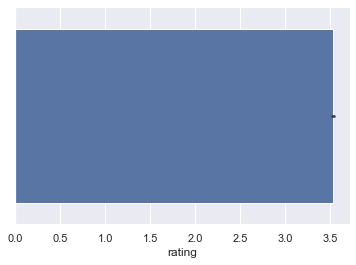

In [187]:
sns.barplot(data3['rating'])

plt.show()

In [188]:
item3 = pd.read_csv('item.csv')

In [189]:
print(item3[10:])
print(item3[-5:])

      movie id                          movie title release date  unknown  \
10          11                       Seven (Se7en)   01-Jan-1995        0   
11          12                 Usual Suspects, The   14-Aug-1995        0   
12          13                    Mighty Aphrodite   30-Oct-1995        0   
13          14                         Postino, Il   01-Jan-1994        0   
14          15                  Mr. Holland's Opus   29-Jan-1996        0   
...        ...                                  ...          ...      ...   
1676      1678                          Mat' i syn   06-Feb-1998        0   
1677      1679                           B. Monkey   06-Feb-1998        0   
1678      1680                       Sliding Doors   01-Jan-1998        0   
1679      1681                        You So Crazy   01-Jan-1994        0   
1680      1682  Scream of Stone (Schrei aus Stein)   08-Mar-1996        0   

      Action  Adventure  Animation  Childrens  Comedy  Crime  ...  Fantasy 

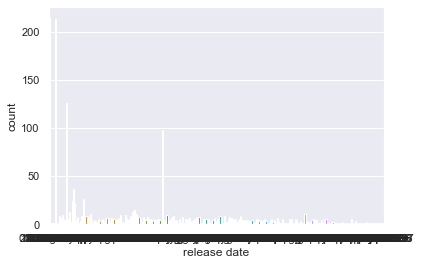

In [190]:
sns.countplot(item3['release date'])

plt.show()

In [191]:
user3 = pd.read_csv('user.csv')

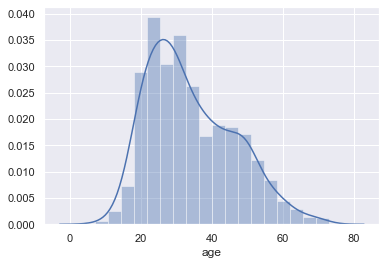

In [192]:
sns.distplot(user3['age'])

plt.show()

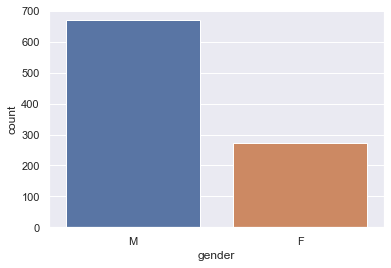

In [193]:
sns.countplot(user3['gender'])

plt.show()

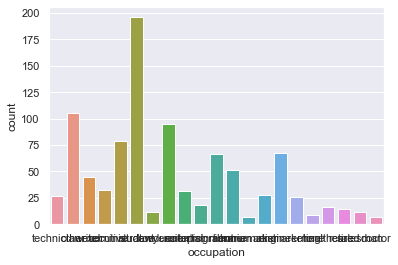

In [194]:
sns.countplot(user3['occupation'])

plt.show()

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

In [195]:
#Your answer here

item4 = pd.read_csv('item.csv')

In [196]:
df = item4
df['Release Year'] = df['release date'].str.extract(r'\b(\w+)$', expand=True)
df

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Release Year
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1995
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1998
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1998
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1998
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1994


In [197]:
df = pd.DataFrame(item4)
df = df.set_index('Release Year')
df.drop('movie title',axis=1,inplace=True)
df.drop('movie id',axis=1,inplace=True)
df

,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
Release Year,,,,,,,,,,,,,,,,,,,,
1995,01-Jan-1995,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1995,01-Jan-1995,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1995,01-Jan-1995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1995,01-Jan-1995,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1995,01-Jan-1995,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998,06-Feb-1998,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1998,06-Feb-1998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1998,01-Jan-1998,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [198]:
df.groupby('Release Year')

In [199]:
RelYr_grouped = df.groupby("Release Year")
RelYr_grouped.sum() 

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
Release Year,,,,,,,,,,,,,,,,,,,
1922,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1926,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1930,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1931,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
1932,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0,30,13,4,15,82,8,9,97,3,0,8,2,2,35,7,25,7,6
1995,0,40,22,6,21,63,11,5,89,3,1,14,3,5,37,15,39,5,2
1996,0,44,24,9,21,108,21,18,170,6,1,11,9,6,38,15,47,9,2


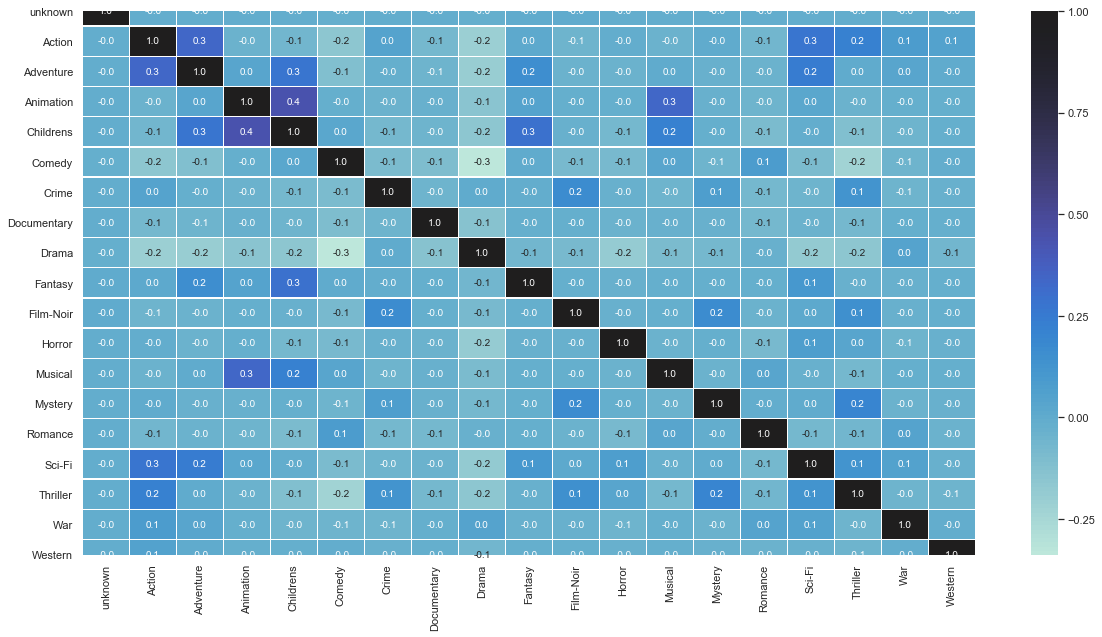

In [200]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )
plt.show()

### 9. Find the top 25 movies, each having a minimum of 100 ratings - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [201]:
#your answer here

df9 = pd.read_csv('Data.csv')

In [202]:
df9 = df9.set_index('user id')
df9

,movie id,rating,timestamp
user id,,,
196,242,3,881250949
186,302,3,891717742
22,377,1,878887116
244,51,2,880606923
166,346,1,886397596
...,...,...,...
880,476,3,880175444
716,204,5,879795543
276,1090,1,874795795


In [203]:
df9.drop('timestamp', axis=1, inplace = True)
df9

,movie id,rating
user id,,
196,242,3
186,302,3
22,377,1
244,51,2
166,346,1
...,...,...
880,476,3
716,204,5
276,1090,1


In [204]:
df10 = pd.read_csv('user.csv')

In [205]:
df10 = df10.set_index('user id')
df10

,age,gender,occupation,zip code
user id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
...,...,...,...,...
939,26,F,student,33319
940,32,M,administrator,02215
941,20,M,student,97229


In [206]:
df10.drop('zip code', axis=1, inplace = True)
df10

,age,gender,occupation
user id,,,
1,24,M,technician
2,53,F,other
3,23,M,writer
4,24,M,technician
5,33,F,other
...,...,...,...
939,26,F,student
940,32,M,administrator
941,20,M,student


In [207]:
df10.drop('occupation', axis=1, inplace = True)
df10

,age,gender
user id,,
1,24,M
2,53,F
3,23,M
4,24,M
5,33,F
...,...,...
939,26,F
940,32,M
941,20,M


In [208]:
df10.drop('gender', axis=1, inplace = True)
df10

,age
user id,
1,24
2,53
3,23
4,24
5,33
...,...
939,26
940,32
941,20


In [209]:
df11 = pd.merge(df9,df10, on='user id')
df11

,movie id,rating,age
user id,,,
196,242,3,49
196,393,4,49
196,381,4,49
196,251,3,49
196,655,5,49
...,...,...,...
941,919,5,20
941,273,3,20
941,1,5,20


In [210]:
df11.drop('age', axis=1, inplace = True)
df11

,movie id,rating
user id,,
196,242,3
196,393,4
196,381,4
196,251,3
196,655,5
...,...,...
941,919,5
941,273,3
941,1,5


In [211]:
df11.groupby('movie id')

In [212]:
MID_grouped = df11.groupby("movie id")
MID_grouped.sum() 

,rating
movie id,
1,1753
2,420
3,273
4,742
5,284
...,...
1678,1
1679,3
1680,2


In [213]:
df8 = pd.read_csv('item.csv')

In [214]:
#df8 = df8.set_index('movie title')
df8

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [215]:
df8.drop('release date', axis = 1, inplace = True)
df8

,movie id,movie title,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,1679,B. Monkey,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1678,1680,Sliding Doors,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1679,1681,You So Crazy,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [216]:
df8.drop('unknown', axis=1, inplace = True)
df8.drop('Action', axis=1, inplace = True)
df8.drop('Adventure', axis=1, inplace = True)
df8.drop('Animation', axis=1, inplace = True)
df8.drop('Childrens', axis=1, inplace = True)
df8.drop('Comedy', axis=1, inplace = True)
df8.drop('Crime', axis=1, inplace = True)
df8.drop('Documentary', axis=1, inplace = True)
df8.drop('Drama', axis=1, inplace = True)
df8.drop('Fantasy', axis=1, inplace = True)
df8.drop('Film-Noir', axis=1, inplace = True)
df8.drop('Horror', axis=1, inplace = True)
df8.drop('Musical', axis=1, inplace = True)
df8.drop('Mystery', axis=1, inplace = True)
df8.drop('Romance', axis=1, inplace = True)
df8.drop('Sci-Fi', axis=1, inplace = True)
df8.drop('Thriller', axis=1, inplace = True)
df8.drop('War', axis=1, inplace = True)
df8.drop('Western', axis=1, inplace = True)
df8

,movie id,movie title
0,1,Toy Story
1,2,GoldenEye
2,3,Four Rooms
3,4,Get Shorty
4,5,Copycat
...,...,...
1676,1678,Mat' i syn
1677,1679,B. Monkey
1678,1680,Sliding Doors
1679,1681,You So Crazy


In [217]:
df7 = pd.merge(df11,df8, on='movie id')
df7

,movie id,rating,movie title
0,242,3,Kolya
1,242,5,Kolya
2,242,4,Kolya
3,242,4,Kolya
4,242,3,Kolya
...,...,...,...
99986,1679,3,B. Monkey
99987,1678,1,Mat' i syn
99988,1680,2,Sliding Doors
99989,1681,3,You So Crazy


In [218]:
df7.count()

movie id       99991
rating         99991
movie title    99991
dtype: int64

In [219]:
df7 = df7.set_index('movie title')
df7

,movie id,rating
movie title,,
Kolya,242,3
Kolya,242,5
Kolya,242,4
Kolya,242,4
Kolya,242,3
...,...,...
B. Monkey,1679,3
Mat' i syn,1678,1
Sliding Doors,1680,2


In [220]:
df7.sort_values('rating')
df7

,movie id,rating
movie title,,
Kolya,242,3
Kolya,242,5
Kolya,242,4
Kolya,242,4
Kolya,242,3
...,...,...
B. Monkey,1679,3
Mat' i syn,1678,1
Sliding Doors,1680,2


In [221]:
df7.groupby('movie title')

In [222]:
df22 = df7.groupby("movie title")
df22.sum() 

,movie id,rating
movie title,,
'Til There Was You,11700,21
1-900,6765,13
101 Dalmatians,24525,317
12 Angry Men,22250,543
187,13530,124
...,...,...
Young Guns,23432,324
Young Guns II,52272,122
"Young Poisoner's Handbook, The",22427,137


In [223]:
df22.quantile(.75)

,movie id,rating
movie title,,
'Til There Was You,1300.0,3.0
1-900,1353.0,4.0
101 Dalmatians,225.0,4.0
12 Angry Men,178.0,5.0
187,330.0,4.0
...,...,...
Young Guns,232.0,4.0
Young Guns II,1188.0,3.0
"Young Poisoner's Handbook, The",547.0,4.0


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



In [224]:
df33 = pd.read_csv('item.csv')

In [225]:
df33.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [226]:
df44 = pd.read_csv('user.csv')

In [227]:
df44.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [228]:
df55 = pd.read_csv('Data.csv')

In [229]:
df55.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [230]:
df66 = pd.merge(df44,df55, on='user id')

In [231]:
df66.head()

,user id,age,gender,occupation,zip code,movie id,rating,timestamp
0,1,24,M,technician,85711,61,4,878542420
1,1,24,M,technician,85711,189,3,888732928
2,1,24,M,technician,85711,33,4,878542699
3,1,24,M,technician,85711,160,4,875072547
4,1,24,M,technician,85711,20,4,887431883


In [232]:
df99 = pd.merge(df33,df66, on='movie id')

In [233]:
df99.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Thriller,War,Western,user id,age,gender,occupation,zip code,rating,timestamp
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,1,24,M,technician,85711,5,874965758
1,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,2,53,F,other,94043,4,888550871
2,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,5,33,F,other,15213,4,875635748
3,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,6,42,M,executive,98101,4,883599478
4,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,10,53,M,lawyer,90703,4,877888877


In [234]:
df99.groupby('gender')

In [235]:
MW_grouped = df99.groupby("gender")
MW_grouped.sum() 

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,user id,age,rating,timestamp
gender,,,,,,,,,,,,,,,,,,,,,
F,11452645,0,5442,3141,995,2232,8068,1794,187,11008,...,1314,5858,2629,5086,2189,371,12225832,831719,90894,22748573259055
M,31097965,1,20147,10612,2610,4950,21764,6261,571,28887,...,3931,13603,10101,16786,7209,1483,34019836,2465018,262061,65596431148640
